importing

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from docx import Document
from docx.shared import Inches 

data input from url

In [6]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv');

spliting, list created, mean should be calculated

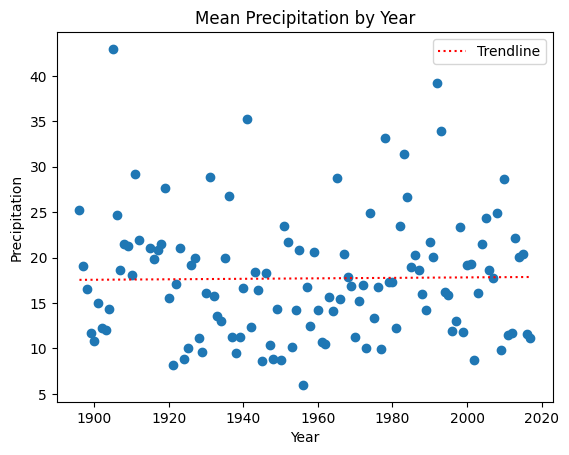

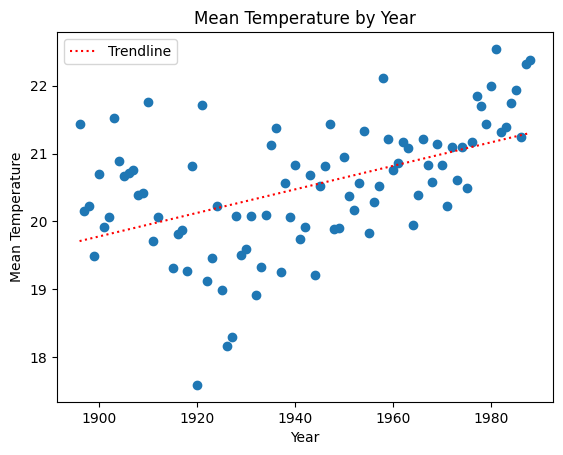

In [7]:
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4);

years = list(range(1896, 2018));

data = [];
for year in years:
    year_data = climate_data[climate_data['YEAR'] == str(year)]
    mean_precip = year_data['PRCP'].mean()
    if not np.isnan(mean_precip):
        data.append({'year': year, 'precipitation': mean_precip})

df = pd.DataFrame(data)
plt.scatter(df['year'], df['precipitation'])
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Mean Precipitation by Year')
coeff = np.polyfit(df['year'], df['precipitation'], 1)
poly_function = np.poly1d(coeff)
trendline = poly_function(df['year'])
plt.plot(df['year'], trendline, color='red', linestyle = 'dotted', label='Trendline')
plt.legend()
plt.savefig('mean_precipitation_by_year.png')
plt.show()

climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)

years = list(range(1896, 2018))

data = []
for year in years:
    year_data = climate_data[climate_data['YEAR'] == str(year)]
    mean_temperature = year_data['TAVG'].mean()
    if not np.isnan(mean_temperature):
        data.append({'year': year, 'temperature': mean_temperature})

df = pd.DataFrame(data)
plt.scatter(df['year'], df['temperature'])
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature by Year')
coeff = np.polyfit(df['year'], df['temperature'], 1)
poly_function = np.poly1d(coeff)
trendline = poly_function(df['year'])
plt.plot(df['year'], trendline, color='red', linestyle='dotted', label='Trendline')
plt.legend()
plt.savefig('mean_temperature_by_year.png')
plt.show()




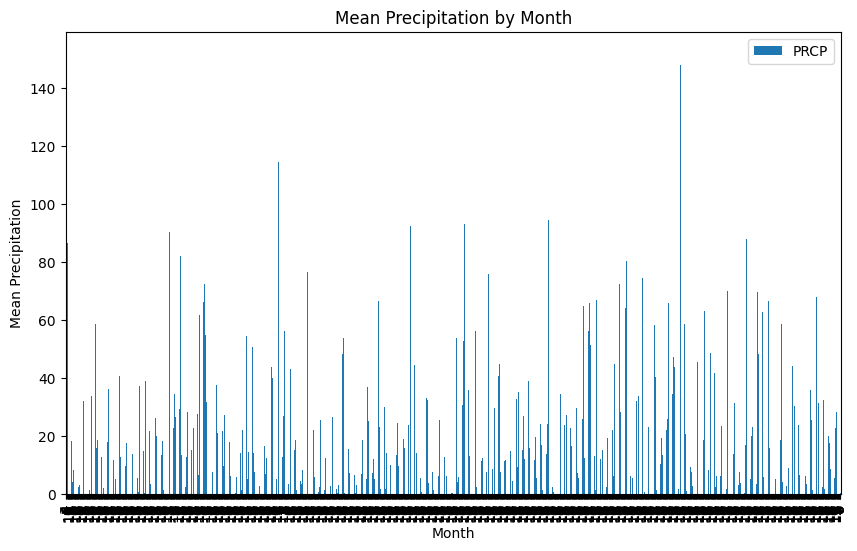

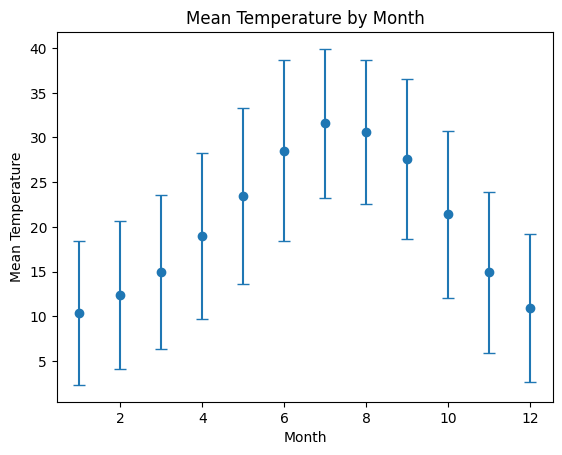

In [8]:
from docx import Document
from docx.shared import Inches
from PIL import Image
climate_data['Year'] = pd.to_datetime(climate_data['DATE']).dt.year
climate_data['Month'] = pd.to_datetime(climate_data['DATE']).dt.month

mean_precipitation = climate_data.groupby(['Year', 'Month'])['PRCP'].mean().reset_index()

mean_precipitation.plot(x='Month', y='PRCP', kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Mean Precipitation')
plt.title('Mean Precipitation by Month')
plt.savefig('mean_precipitation_by_month.png')
plt.show()

'''
mean_temperature = climate_data.groupby(['Year', 'Month'])['TAVG'].mean().reset_index()
mean_max_temperature = climate_data.groupby(['Year', 'Month'])['TMAX'].mean().reset_index()
mean_min_temperature = climate_data.groupby(['Year', 'Month'])['TMIN'].mean().reset_index()

plt.errorbar(mean_temperature['Month'], mean_temperature['TAVG'], yerr=[mean_temperature['TAVG'] - mean_min_temperature['TMIN'], mean_max_temperature['TMAX'] - mean_temperature['TAVG']], fmt='o', capsize=4)
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature by Month')
plt.show()
'''

mean_jan_temperature = climate_data[climate_data['Month'] == 1].groupby('Year')['TAVG'].mean().reset_index()
mean_max_jan_temperature = climate_data[climate_data['Month'] == 1].groupby('Year')['TMAX'].mean().reset_index()
mean_min_jan_temperature = climate_data[climate_data['Month'] == 1].groupby('Year')['TMIN'].mean().reset_index()

mean_temperature = pd.DataFrame({'Month': range(1, 13)})
mean_temperature['TAVG'] = climate_data.groupby('Month')['TAVG'].mean().values
mean_max_temperature = pd.DataFrame({'Month': range(1, 13)})
mean_max_temperature['TMAX'] = climate_data.groupby('Month')['TMAX'].mean().values
mean_min_temperature = pd.DataFrame({'Month': range(1, 13)})
mean_min_temperature['TMIN'] = climate_data.groupby('Month')['TMIN'].mean().values

plt.errorbar(mean_temperature['Month'], mean_temperature['TAVG'], yerr=[mean_temperature['TAVG'] - mean_min_temperature['TMIN'], mean_max_temperature['TMAX'] - mean_temperature['TAVG']], fmt='o', capsize=4)
plt.xlabel('Month')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature by Month')
plt.savefig('mean_temperature_by_month.png')
plt.show()

doc = Document()
doc.add_picture('mean_precipitation_by_year.png', width=Inches(6))
doc.add_heading('Mean Precipitation by Year')
doc.add_paragraph('The graph above shows the mean precipitation by year from 1896 to 2017. The red dotted line represents the trendline.')
doc.add_picture('mean_temperature_by_year.png', width=Inches(6))
doc.add_heading('Mean Temperature by Year')
doc.add_paragraph('The graph above shows the mean temperature by year from 1896 to 2017. The red dotted line represents the trendline.')
doc.add_picture('mean_precipitation_by_month.png', width=Inches(6))
doc.add_heading('Mean Precipitation by Month')
doc.add_paragraph('The graph above shows the mean precipitation by month.')
doc.add_picture('mean_temperature_by_month.png', width=Inches(6))
doc.add_heading('Mean Temperature by Month')
doc.add_paragraph('The graph above shows the mean temperature by month. The error bars represent the range between the mean minimum and maximum temperatures.')
doc.save('/Users/jhl/Desktop/climate_analysis.docx')

